# Quatitative Evaluation

Flipping the top pixels and see how much logodds drop in terms of the top-1 classification error.

First, we load the logodds from 4 folders, and take the common parts out.
- AE_p_b
- AE_vbd
- VAE_p_b (5 samples)
- VAE_vbd

In [1]:
%matplotlib inline
import torch
import os
import pandas as pd
import seaborn as sns

Take out all the files end with 'records.th'

In [2]:
def get_file_names(directory):
    directory = os.path.join('../result', directory)
    result = []
    for filename in os.listdir(directory):
        if filename.endswith("records.th"): 
            result.append(filename)
    return result

In [10]:
identifiers = [ '1005-p_b',
    '1005-vbd-p0.5-0.001', '1005-vbd-p0.5-0.01', '1005-vbd-p0.5-0.1',
    '1005-vbd-p0.999-1E-4', '1005-vbd-p0.999-1E-5', '1005-vbd-p0.999-1E-6',
    '1005-vbdl1-1E-3', '1005-vbdl1-1E-4', '1005-vbdl1-1E-5',
              ]
arr = [get_file_names('../result/{}'.format(i)) for i in identifiers]

def prepare_pd_table(arr, identifiers):
    result = []
    for i in xrange(len(identifiers)):
        identifier = identifiers[i]
        
        for j in xrange(len(arr[i])):
            orig_log_odds, all_log_odds_dict, unnormalized_img, imp_vector = \
                torch.load(os.path.join('../result', '%s' % identifier, arr[i][j]))
            
            for key in all_log_odds_dict:
                log_odds_drop = orig_log_odds - all_log_odds_dict[key]
                result.append([identifier + '(n = %d)' % (len(arr[i])), j, key, log_odds_drop])
    result = pd.DataFrame(result)
    result.columns = ['method', 'img_index', 'num_flippings', 'odds_diff']
    return result

## Compare btw vbd, vbdf1, vbd 0.999

Notice only 20 images here

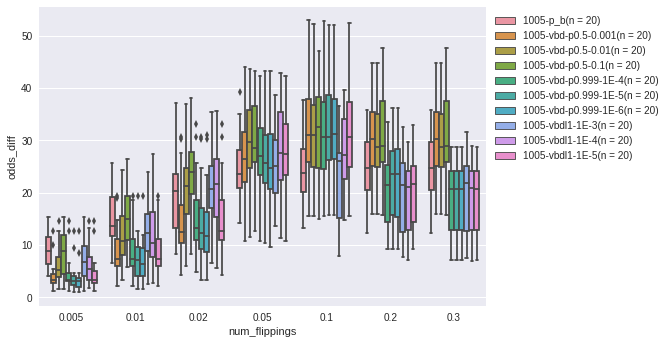

In [11]:
table = prepare_pd_table(arr, identifiers)
ax = sns.boxplot(x="num_flippings", y="odds_diff", hue="method", data=table)
ax.legend(bbox_to_anchor=(1, 1))